# **H1 Big Data | Term Assignment 1 - Example Solution**

In [ ]:
# Import required libraries

#Pandas is needed for Dataframe object type and (relational) data management
import pandas as pd

**1. What is the most common age in the social network? How many people share**

In [ ]:
# We import the users.csv table

df_users = pd.read_csv("sample_data/user_table.csv",sep=",")

In [ ]:
df_users.sort_values(by=["Age"],axis=0,inplace=True,ascending=False)

In [ ]:

df_users.head(10)

,Surname,Name,Age,Subscription Date
557,Wellington,Ali,62,1588156913
994,Di Lillo,Robert,62,1588158988
306,Picard,Ali,59,1588162994
58,Picard,Hans,58,1588162600
515,Wellington,Josie,57,1588158926
125,Stephenson,Josie,57,1588153925
748,Roth,Jordi,57,1588161553
245,Pomme,Simon,57,1588164296
803,Bond,Sarah,56,1588156811
732,Wellington,Anna,56,1588156062


In [ ]:
df_users.Age.value_counts()

 35    46
 30    44
 29    41
 38    41
 33    40
 44    39
 36    39
 40    38
 28    37
 32    36
 31    33
 37    31
 39    30
 43    30
 42    29
 41    28
 34    28
 27    27
 26    27
 24    26
 22    23
 45    21
 49    19
 47    18
 25    18
 48    16
 18    16
 23    15
 19    15
 21    15
 46    13
 51    13
 20    11
 17    11
 15    10
 14     9
 50     9
 53     8
 52     6
 16     5
 12     5
 10     4
 57     4
 56     4
 55     4
 54     4
 9      3
 8      2
 62     2
 13     2
 59     1
 58     1
 6      1
 5      1
-5      1
Name: Age, dtype: int64

We see that age 35 is shared by 46 ppl

**2. List the five people with least posts and reactions combined.**

In order to obtain the answer to this question, we need to combine to three tables: user table, posts table and reactions table. We load the missing tables.

In [ ]:
df_posts = pd.read_csv("sample_data/posts_table.csv",sep=",")
df_reactions = pd.read_csv("sample_data/reactions_table.csv",sep=",")

In [ ]:
df_posts.head(10)

,User,Post Type,Post Date
0,1,Image,1588166977
1,1,Status_Change,1588167686
2,1,Text,1588168633
3,1,Image,1588163570
4,1,Image,1588168986
5,1,Image,1588163050
6,1,Status_Change,1588163267
7,1,Video,1588163211
8,1,Image,1588166444
9,1,Status_Change,1588163571


In [ ]:
df_reactions.head(10)

,User,Reaction Type,Reaction Date
0,3741,Comment,1588168107
1,711,Emoticon,1588166846
2,701,Emoticon,1588163334
3,4750,Emoticon,1588168182
4,656,Comment,1588162272
5,673,Like,1588165271
6,6204,Emoticon,1588165833
7,5313,Like,1588167680
8,5164,Like,1588164462
9,833,Comment,1588168814


Looking at the user table, there is a minor complication: We have no explicit index given. However, it seems natural to add a new column with an index that just enumerates the lines (in order of appearance in the data file):

In [ ]:
index = range(1,1001,1)
df_users['Index'] = index
df_users.head(10)

,Surname,Name,Age,Subscription Date,Index
557,Wellington,Ali,62,1588156913,1
994,Di Lillo,Robert,62,1588158988,2
306,Picard,Ali,59,1588162994,3
58,Picard,Hans,58,1588162600,4
515,Wellington,Josie,57,1588158926,5
125,Stephenson,Josie,57,1588153925,6
748,Roth,Jordi,57,1588161553,7
245,Pomme,Simon,57,1588164296,8
803,Bond,Sarah,56,1588156811,9
732,Wellington,Anna,56,1588156062,10


Now we can match with the posts and reactions tables. But lets get the posts and reaction count first per user.

In [ ]:
df_count_posts = df_posts.groupby(["User"]).count()
print(df_count_posts.head(5))
df_count_reactions = df_reactions.groupby(["User"]).count()
print(df_count_reactions.head(5))

      Post Type  Post Date
User                      
1            18         18
2            11         11
3            13         13
4            15         15
5            10         10
      Reaction Type  Reaction Date
User                              
17              122            122
65               91             91
66              121            121
67              130            130
68              115            115


In [ ]:
df_merge_col = pd.merge(df_count_posts, df_count_reactions, on='User')
# SQL: SELECT POSTS,REACTIONS from df_count_reactions JOIN df_count_posts on USER
df_merge_col = df_merge_col.drop(['Post Date','Reaction Date'],axis=1)

df_merge_col['Total Interactions'] = df_merge_col['Post Type'] + df_merge_col['Reaction Type']
#print(df_merge_col)
df_merge_col.sort_values(by=['Total Interactions'],axis=0,inplace=True,ascending=False)
df_merge_col.sort_index(axis=1,ascending=False,inplace=True)
df_merge_col['UserID'] = df_merge_col.index
df_merge_col.head(10)

,Total Interactions,Reaction Type,Post Type,UserID
User,,,,
642,241,217,24,642
664,154,130,24,664
67,151,130,21,67
678,150,130,20,678
653,148,139,9,653
118,147,129,18,118
690,146,124,22,690
639,146,131,15,639
725,143,123,20,725


In [ ]:
df_users = df_users.rename(columns={"Index": "UserID"})
print(df_users.head(5))
df_merged_users_with_reactions = pd.merge(df_users, df_merge_col, on='UserID')
df_merged_users_with_reactions.sort_values(by=['Total Interactions'],axis=0,inplace=True,ascending=False)
df_merged_users_with_reactions.head()

        Surname    Name  Age  Subscription Date  UserID
557  Wellington     Ali   62         1588156913       1
994    Di Lillo  Robert   62         1588158988       2
306      Picard     Ali   59         1588162994       3
58       Picard    Hans   58         1588162600       4
515  Wellington   Josie   57         1588158926       5


,Surname,Name,Age,Subscription Date,UserID,Total Interactions,Reaction Type,Post Type
25,Picard,Zoe,30,1588162165,642,241,217,24
47,Mueller,Robert,30,1588159592,664,154,130,24
3,Meier,Zoe,49,1588167835,67,151,130,21
61,Pomme,Thomas,29,1588159655,678,150,130,20
36,Di Lillo,Thomas,30,1588157566,653,148,139,9


In [ ]:
df_merged_users_with_reactions = df_merged_users_with_reactions.drop(['Surname','Name','Age','Subscription Date','Post Type','Reaction Type'],axis=1)
df_merged_users_with_reactions.sort_values(by=['Total Interactions'],axis=0,inplace=True,ascending=False)

We find that the five people with the least combined interactions are, in order:

In [ ]:
df_merged_users_with_reactions.sort_values("Total Interactions")

#df_merged_users_with_reactions

,UserID,Total Interactions
1,65,93
66,683,96
64,681,96
8,72,100
90,707,100
...,...,...
36,653,148
61,678,150
3,67,151
47,664,154


In [ ]:
df_merged_users_with_reactions.tail(5)

,UserID,Total Interactions
90,707,100
8,72,100
64,681,96
66,683,96
1,65,93


**3. Create a plot of the friendship graph for all users named „Jean-Luc Picard, Jean-Luc Roth**

The first step, as usual, is to load the data, in this case the friends_table.csv.

In [ ]:
df_friends = pd.read_csv("sample_data/friends_table.csv",sep=",")

 There is no person with the name Jean Luc Picard in the social network
 The person with the name of Jean Luc Roth are with the user id 76, 330, 369, 897

In [ ]:
df_users_Jeanlucroth = df_users[(df_users['Name'] == "Jean-Luc")] 
df_users_Jeanlucroth = df_users_Jeanlucroth[(df_users_Jeanlucroth['Surname'] == "Roth")]
df_users_Jeanlucroth

,Surname,Name,Age,Subscription Date,UserID
76,Roth,Jean-Luc,40,1588150286,292
369,Roth,Jean-Luc,35,1588155440,463
897,Roth,Jean-Luc,29,1588161280,704
330,Roth,Jean-Luc,25,1588156458,824


In [ ]:
import networkx as nx
import matplotlib.pyplot as mplt

In [ ]:
friends_df_graph = df_friends[(df_friends['Friend 1'] == 292) | (df_friends['Friend 1'] == 463 ) |
                     (df_friends['Friend 1'] == 824) | (df_friends['Friend 1'] == 704)]           
Graph=nx.from_pandas_edgelist(friends_df_graph, 'Friend 1', 'Friend 2')

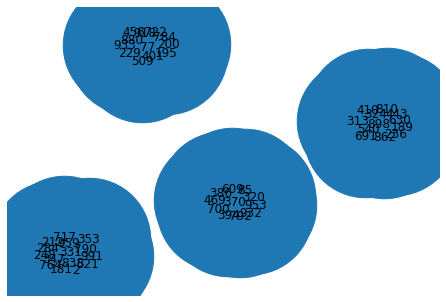

In [ ]:
nx.draw(Graph, with_labels=True, node_size=15000)
mplt.show()

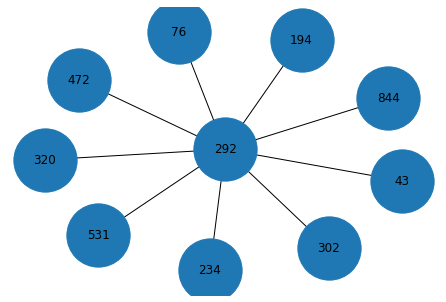

In [ ]:
friends_df_graph_1 = df_friends[(df_friends['Friend 1'] == 292)]
Graph_1=nx.from_pandas_edgelist(friends_df_graph_1, 'Friend 1', 'Friend 2')
nx.draw(Graph_1, with_labels=True, node_size=4000)
mplt.show()